In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("CTR.txt", sep=":|;", header=None, index_col=0)

<ipython-input-19-bcf1b6e49625>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("CTR.txt", sep=":|;", header=None, index_col=0)


In [20]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
0,0.748371,0.835208,0.076699,0.172439,0.143446,0.103419,0.190698,0.000000,0.102401,0.036312,0.074562,0.234702,0.000000,0.000000,0.078574
1,0.168419,0.133754,0.434864,0.995678,0.048800,0.000000,0.000000,0.000000,0.020827,0.000000,0.000000,0.022586,0.000000,0.146548,0.324596
2,0.485287,0.566989,0.041657,0.962560,0.185080,0.109575,0.136626,0.000000,0.098411,0.074771,0.000000,0.000000,0.000000,0.014760,0.193677
3,0.622231,0.196123,0.131147,0.439719,0.298934,0.000000,0.151069,0.000000,0.127239,0.112239,0.000000,0.012022,0.034284,0.000000,0.086177
4,0.331710,0.086411,0.023036,0.925518,0.333580,0.000000,0.109214,0.000000,0.151938,0.049861,0.000000,0.000000,0.037427,0.118916,0.216592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.884773,0.573188,0.440228,0.442069,0.570648,0.000000,0.050079,0.000000,0.351960,0.000000,0.000000,0.209117,0.000000,0.000000,0.179310
4996,0.356803,0.480906,0.770139,0.000733,0.823579,0.000000,0.091090,0.053692,0.454966,0.000000,0.000000,0.197713,0.082983,0.000000,0.239932
4997,0.906725,0.264433,0.689159,0.794771,0.619311,0.000000,0.089158,0.000000,0.357520,0.025167,0.000000,0.000000,0.000000,0.000000,0.346313


In [5]:
n, c = data.shape

In [14]:
data.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

## Stratégie Random : 
A chaque itération, on choisit n'importe quel annonceur


In [6]:
select = np.random.randint(5, 15, n)
reward = np.zeros(n)
i = 0
for s in select:
    reward[i] = data.iloc[i, s]
    i += 1
total_reward_random = np.cumsum(reward)


## Stratégie StaticBest : (triche) 
A chaque itération, on choisit l'annonceur avec le meilleur taux de clics cumulés

In [75]:
scores = data.iloc[:, 5:15]
scores_cumule = scores.sum()
best_ann = scores_cumule.idxmax()
reward = scores.iloc[:, best_ann]
total_reward_best = np.cumsum(reward).to_numpy()

## Stratégie Optimale : (triche)
A chaque iteration, on choisit l'annonceur qui a le meilleur taux de clics à cette itération

In [80]:
scores = data.iloc[:, 5:15]
optimal_score = scores.max(axis=1)
total_reward_optimal =  np.cumsum(optimal_score)

## UCB:
Initialisation, 1 -> 1, 2 -> 2...

In [108]:
scores = data.iloc[:, 5:15]
# upper-confidence Bound table
B = np.zeros((n, 10))
# number of selected time of annoncer
count = np.zeros(10)
# total reward of annoncer
reward_empirique = np.zeros(10)
ucb_reward = np.zeros(n)

for i in range(10):
    B[i, i] = 1
    count[i] += 1
    reward_empirique[i] += scores.iloc[i, i]
    ucb_reward[i] = scores.iloc[i, i]

In [109]:
for i in np.arange(10, n):
    B[i] = reward_empirique / count + np.sqrt((2 * np.log(i + 1))/count)
    c = B[i].argmax()
    s = scores.iloc[i, c]
    ucb_reward[i] = s
    reward_empirique[c] += s
    count[c] += 1
total_ucb_reward = np.cumsum(ucb_reward)

## Lin UCB:

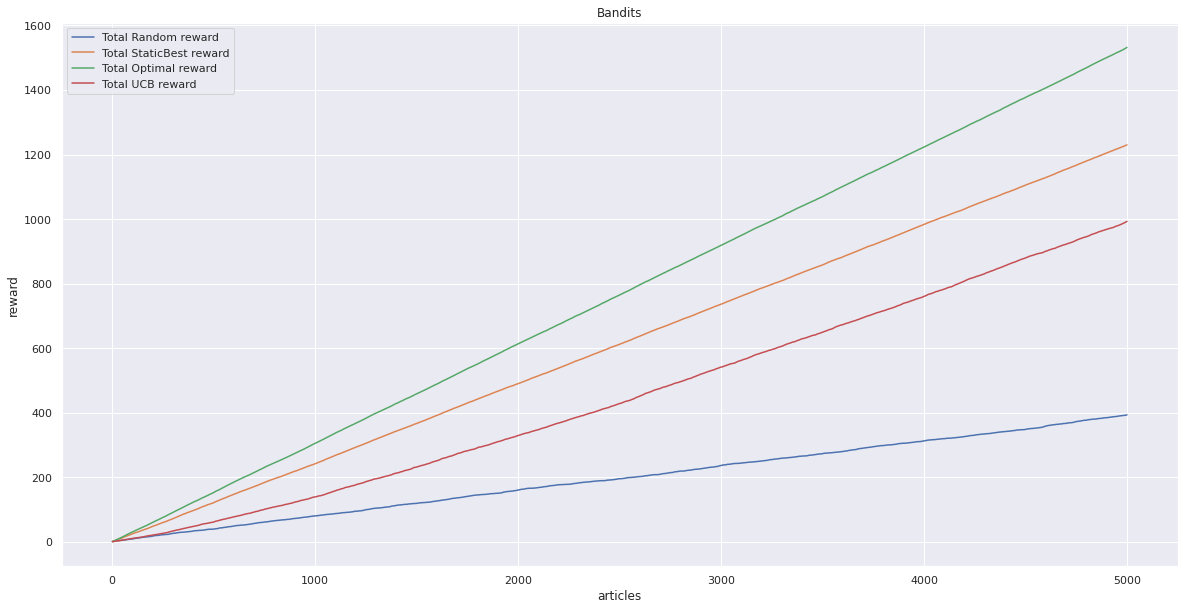

In [110]:
# plot the results
t = np.arange(1, n + 1)
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(t, total_reward_random, label="Total Random reward")
ax.plot(t, total_reward_best, label="Total StaticBest reward")
ax.plot(t, total_reward_optimal, label="Total Optimal reward")
ax.plot(t, total_ucb_reward, label="Total UCB reward")
ax.set_xlabel('articles')
ax.set_ylabel('reward')
ax.set_title('Bandits')
ax.legend()